In [5]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns
import numpy as np
# Create a spark session (which will run spark jobs)
spark = (
    SparkSession.builder.appName("MAST30034 Tutorial 1")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .getOrCreate()
)

In [6]:
merchant_info = spark.read.parquet('../data/curated/merchant_info.parquet')
merchant_info.limit(3)

Store_type,Revenue_levels,Take_rate,count_of_bigorder,Avg_amount_monthly,Avg_count_monthly,Order_avg_value,postcode,avg_prob_fraud_cus,prob_num_of_fraud,count_cus_per_mon,merchant_abn,fix_cus_num,avg_income_percentage,avg_age_percentage
"furniture, home f...",e,5157.0522,0,28650.29,159.94,179.13,5582,13.103379067059794,0.002960769800148...,150.11,10023283211,0,0.14604574262882336,0.4886528247223563
"cable, satellite,...",b,15788.5392,0,3741.36,143.5,26.07,6438,13.235562244148692,0.004918032786885246,135.56,10142254217,0,0.30401763841254287,0.7375104079933389
"jewelry, watch, c...",b,13733.016000000001,3,3121.14,0.28,11236.09,6421,18.309874962268612,0.0,0.28,10165489824,0,0.27759516139635787,0.5837680097854485


In [7]:
merchant_info = merchant_info.toPandas()

In [8]:
#View the relationship between travel_time_mins vs tip_amount
# plot

import matplotlib.pyplot as plt
##plt.scatter(merchant_info['Order_avg_value'], merchant_info['num_of_fraud'])
plt.show()

In [9]:
def get_bin(df,bar_num):
    bar_list = []
    max_value = int(df.max()+1)
    min_value = int(df.min())
    t_bar_range = max_value - min_value
    bar_range = np.round(t_bar_range/bar_num)
    for i in range(0 ,bar_num):
        num = min_value + i*bar_range
        bar_list.append(num)
    bar_list.append(max_value)
    return bar_list

Text(0.5, 1.0, 'The distribution of the average value of each order')

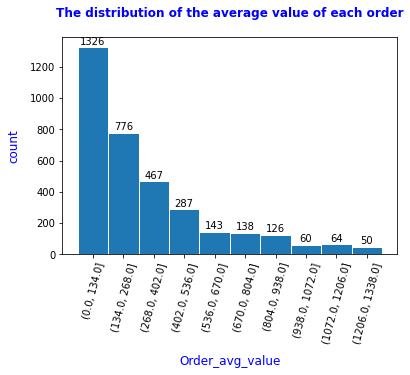

In [10]:
# Order_avg_value
bins = get_bin(merchant_info['count_cus_per_mon'],10)

dff_count_cus_per_mon = merchant_info.groupby(pd.cut(merchant_info['Order_avg_value'], bins=bins))['fix_cus_num'].count()
dff_count_cus_per_mon = dff_count_cus_per_mon.to_frame().reset_index()
dff = dff_count_cus_per_mon.rename(columns={"Order_avg_value": "index", "fix_cus_num": "count"})

fig, ax = plt.subplots()

y = dff['count']

bars = ax.bar(
    x = range(1,11),
    height = y, edgecolor='white',
    tick_label = dff['index'], width = 1
)
plt.xticks(rotation=75)

#add the average tip_amount number on the top of each bar chart
ax.bar_label(bars, padding=1, color = 'black', fontsize=10)
ax.xaxis.grid(False)

#show the bar chart and add the title and labels
ax.set_ylabel('count', labelpad = 10, color = 'blue', fontsize=12)
ax.set_xlabel('Order_avg_value', labelpad = 10, color = 'blue', fontsize=12)
ax.set_title('The distribution of the average value of each order', pad = 20, color = 'blue', weight = 'bold')

Text(0.5, 1.0, 'The distribution of average number of differnet consumer per month per shop')

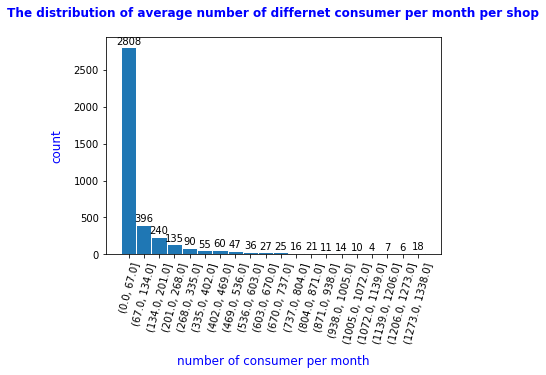

In [11]:
# count_cus_per_mon
bins = get_bin(merchant_info['count_cus_per_mon'],20)

dff_count_cus_per_mon = merchant_info.groupby(pd.cut(merchant_info['count_cus_per_mon'], bins=bins))['fix_cus_num'].count()
dff_count_cus_per_mon = dff_count_cus_per_mon.to_frame().reset_index()
dff = dff_count_cus_per_mon.rename(columns={"count_cus_per_mon": "index", "fix_cus_num": "count"})

fig, ax = plt.subplots()

y = dff['count']

bars = ax.bar(
    x = range(1,21),
    height = y, edgecolor='white',
    tick_label = dff['index'], width = 1
)
plt.xticks(rotation=75)

#add the average tip_amount number on the top of each bar chart
ax.bar_label(bars, padding=1, color = 'black', fontsize=10)
ax.xaxis.grid(False)

#show the bar chart and add the title and labels
ax.set_ylabel('count', labelpad = 10, color = 'blue', fontsize=12)
ax.set_xlabel('number of consumer per month', labelpad = 10, color = 'blue', fontsize=12)
ax.set_title('The distribution of average number of different consumer per month per shop', pad = 20, color = 'blue', weight = 'bold')

In [58]:
merchant_info_amount_small = merchant_info[merchant_info['Avg_amount_monthly'] <= 51000]
merchant_info_amount_large = merchant_info[merchant_info['Avg_amount_monthly'] > 51000]

Text(0.5, 1.0, 'The distribution of the average amount of the transaction in each month')

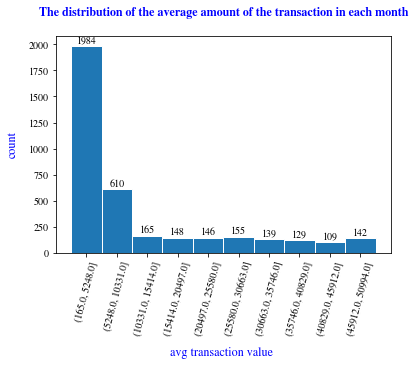

In [59]:
# Avg_amount_monthly small
bins = get_bin(merchant_info_amount_small['Avg_amount_monthly'],10)

dff_count_cus_per_mon = merchant_info_amount_small.groupby(pd.cut(merchant_info['Avg_amount_monthly'], bins=bins))['fix_cus_num'].count()
dff_count_cus_per_mon = dff_count_cus_per_mon.to_frame().reset_index()
dff = dff_count_cus_per_mon.rename(columns={"Avg_amount_monthly": "index", "fix_cus_num": "count"})

fig, ax = plt.subplots()

y = dff['count']

bars = ax.bar(
    x = range(1,11),
    height = y, edgecolor='white',
    tick_label = dff['index'], width = 1
)
plt.xticks(rotation=75)

#add the average tip_amount number on the top of each bar chart
ax.bar_label(bars, padding=1, color = 'black', fontsize=10)
ax.xaxis.grid(False)

#show the bar chart and add the title and labels
ax.set_ylabel('count', labelpad = 10, color = 'blue', fontsize=12)
ax.set_xlabel('avg transaction value ', labelpad = 10, color = 'blue', fontsize=12)
ax.set_title('The distribution of the average amount of the transaction in each month', pad = 20, color = 'blue', weight = 'bold')

Text(0.5, 1.0, 'The number of different store type with large amount monthly')

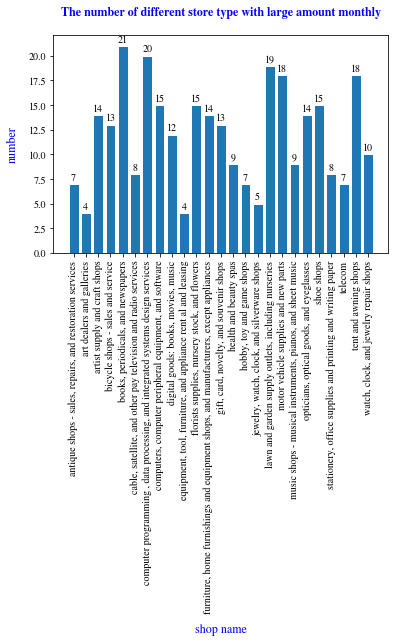

In [61]:
# store type with large amount
tz_df = merchant_info_amount_large[['Store_type','Revenue_levels']].groupby(['Store_type']).count()

fig, ax = plt.subplots()

y = tz_df['Revenue_levels']

bars = ax.bar(
    x = range(1,26),
    height = y, edgecolor='white',
    tick_label = tz_df.index, width = 0.8
)

plt.xticks(rotation=90)
ax.bar_label(bars, padding=2, color = 'black', fontsize=10)
ax.xaxis.grid(False)

ax.set_ylabel('number', labelpad = 10, color = 'blue', fontsize=12)
ax.set_xlabel('shop name', labelpad = 10, color = 'blue', fontsize=12)
ax.set_title('The number of different store type with large amount monthly', pad = 20, color = 'blue', weight = 'bold')


In [42]:
merchant_info_count_small = merchant_info[merchant_info['Avg_count_monthly'] <= 1400]
merchant_info_count_large = merchant_info[merchant_info['Avg_count_monthly'] > 1400]


Text(0.5, 1.0, 'The distribution of the average count of the transaction under 1400 in each month (small)')

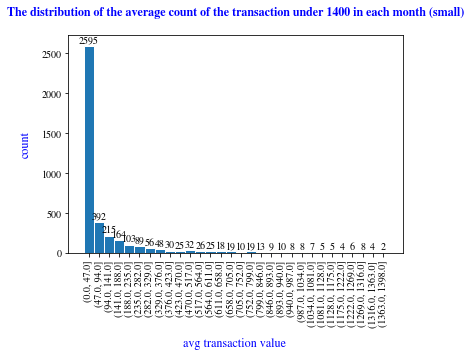

In [52]:
# Avg_count_monthly_small
bins = get_bin(merchant_info_count_small['Avg_count_monthly'],30)

dff_count_cus_per_mon = merchant_info_count_small.groupby(pd.cut(merchant_info_small['Avg_count_monthly'], bins=bins))['fix_cus_num'].count()
dff_count_cus_per_mon = dff_count_cus_per_mon.to_frame().reset_index()
dff = dff_count_cus_per_mon.rename(columns={"Avg_count_monthly": "index", "fix_cus_num": "count"})

fig, ax = plt.subplots()

y = dff['count']

bars = ax.bar(
    x = range(1,31),
    height = y, edgecolor='white',
    tick_label = dff['index'], width = 1
)
plt.xticks(rotation=90)

#add the average tip_amount number on the top of each bar chart
ax.bar_label(bars, padding=1, color = 'black', fontsize=10)
ax.xaxis.grid(False)


#show the bar chart and add the title and labels
ax.set_ylabel('count', labelpad = 10, color = 'blue', fontsize=12)
ax.set_xlabel('avg transaction value ', labelpad = 10, color = 'blue', fontsize=12)
#plt.xticks(np.arange(0, 201, step=7))
ax.set_title('The distribution of the average count of the transaction under 1400 in each month (small)', pad = 20, color = 'blue', weight = 'bold')

Text(0.5, 1.0, 'The number of different store type with count monthly')

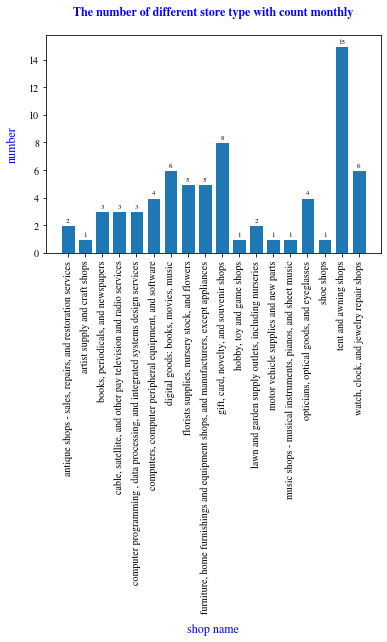

In [54]:
# store type with large count
tz_df = merchant_info_count_large[['Store_type','Revenue_levels']].groupby(['Store_type']).count()

fig, ax = plt.subplots()

y = tz_df['Revenue_levels']

bars = ax.bar(
    x = range(1,19),
    height = y, edgecolor='white',
    tick_label = tz_df.index, width = 0.8
)

plt.xticks(rotation=90)
ax.bar_label(bars, padding=2, color = 'black', fontsize=7)
ax.xaxis.grid(False)

ax.set_ylabel('number', labelpad = 10, color = 'blue', fontsize=12)
ax.set_xlabel('shop name', labelpad = 10, color = 'blue', fontsize=12)
ax.set_title('The number of different store type with large count monthly', pad = 20, color = 'blue', weight = 'bold')


Text(0.5, 1.0, 'The number of different shops')

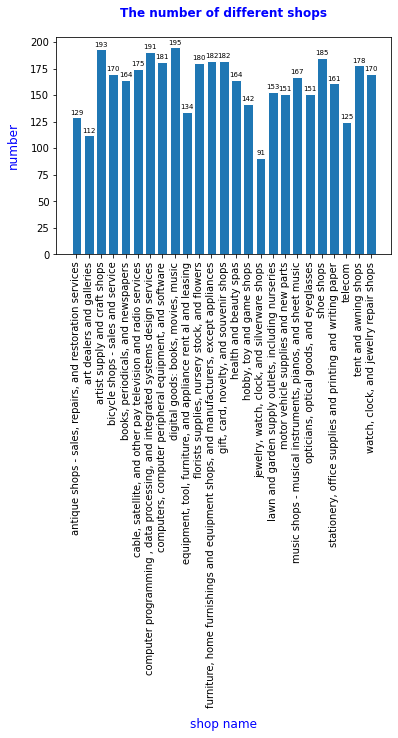

In [ ]:
# store type
tz_df = merchant_info[['Store_type','Revenue_levels']].groupby(['Store_type']).count()

fig, ax = plt.subplots()

y = tz_df['Revenue_levels']

bars = ax.bar(
    x = range(1,26),
    height = y, edgecolor='white',
    tick_label = tz_df.index, width = 0.8
)

plt.xticks(rotation=90)
ax.bar_label(bars, padding=2, color = 'black', fontsize=7)
ax.xaxis.grid(False)

ax.set_ylabel('number', labelpad = 10, color = 'blue', fontsize=12)
ax.set_xlabel('shop name', labelpad = 10, color = 'blue', fontsize=12)
ax.set_title('The number of different store type', pad = 20, color = 'blue', weight = 'bold')


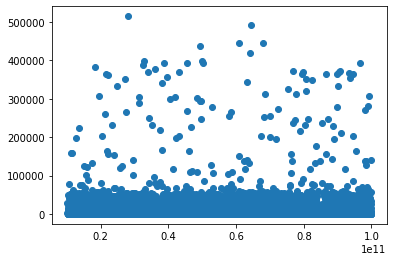

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(merchant_info['merchant_abn'], merchant_info['Avg_amount_monthly'])
plt.show()

In [ ]:
Avg_amount_monthly_corr = merchant_info.drop(['num_of_fraud','fix_cus_num'], axis =1)

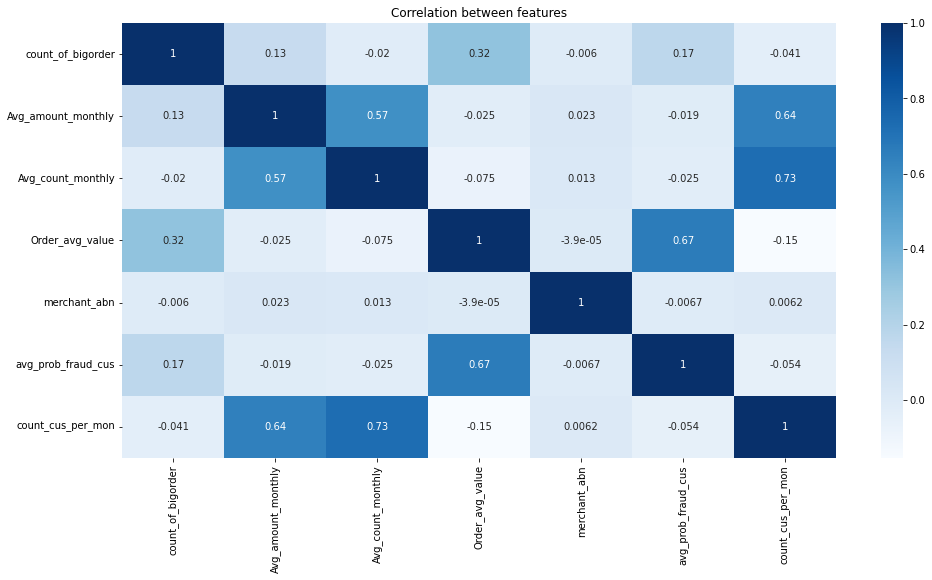

In [ ]:
import seaborn as sns
#draw the heatmap
plt.figure(figsize=(16,8))
cor = Avg_amount_monthly_corr.corr()
heatmap = sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
heatmap.set_title('Correlation between features')
plt.show()